## **Part 2: Data Visualization**

### **Step 1: Create a New Notebook for Visualizations**
- Create a new Jupyter Notebook named `data_visualization.ipynb`.
- Import the necessary libraries: pandas, numpy, matplotlib, seaborn.

### **Step 2: Import the Combined Data**
- Load the combined DataFrame from Part 1 into the notebook.
- Display the first few rows to ensure the data loaded correctly.

### **Step 3: Bar Chart of Orders by Day of the Week**
- Create a bar chart to visualize the frequency of orders by day of the week.
- Export the bar chart as a `.png` file.

### **Step 4: Histogram of Order Hour of Day**
- Create a histogram to show the distribution of orders by hour of the day.
- Add a markdown cell to describe the insights from the histogram.
- Export the histogram as a `.png` file.

### **Step 5: Bar Chart of Customer Loyalty**
- Create a `loyalty_flag` column based on the number of orders:
  - **Loyal customer:** more than 40 orders.
  - **Regular customer:** 11 to 40 orders.
  - **New customer:** 10 or fewer orders.
- Visualize the distribution of customers by loyalty flag using a bar chart.
- Export the bar chart as a `.png` file.

### **Step 6: Line Chart of Prices vs Order Hour of Day**
- Take a random sample of the data and create a line chart to analyze expenditure by hour of the day.
- Use the `order_hour_of_day` for the x-axis and `prices` for the y-axis.
- Export the line chart as a `.png` file.

### **Step 7: Line Chart of Age and Number of Dependants**
- Create a line chart to explore the relationship between `age` and `num_dependants`.
- Describe insights in a markdown cell below the chart.
- Export the line chart as a `.png` file.

### **Step 8: Scatterplot of Age and Income**
- Create a scatterplot to analyze the relationship between `age` and `income`.
- Describe insights in a markdown cell below the scatterplot.
- Export the scatterplot as a `.png` file.

### **Step 9: Finalize 
- Ensure all visualizations are correctly exported and saved.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Path to project folder
project_path = r'C:\Users\sudee\OneDrive\Documents\Python Scripts\Instacart Basket Analysis'

# File paths
combined_data_path = os.path.join(project_path, '02 Data', 'Prepared Data', 'combined_with_customers.pkl')

# Load the combined data
df_combined = pd.read_pickle(combined_data_path)

# Display the first few rows of the dataframe
df_combined.head()


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,prices,...,spending_flag,order_frequency_flag,surname,Gender,STATE,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,11.114836,196,1,0,9.0,...,Low spender,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,11.114836,14084,2,0,12.5,...,Low spender,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,11.114836,12427,3,0,4.4,...,Low spender,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,11.114836,26088,4,0,4.7,...,Low spender,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,11.114836,26405,5,0,1.0,...,Low spender,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [15]:
# Create the directory if it does not exist
visualization_path = os.path.join(project_path, '04 Analysis', 'Visualizations')
if not os.path.exists(visualization_path):
    os.makedirs(visualization_path)

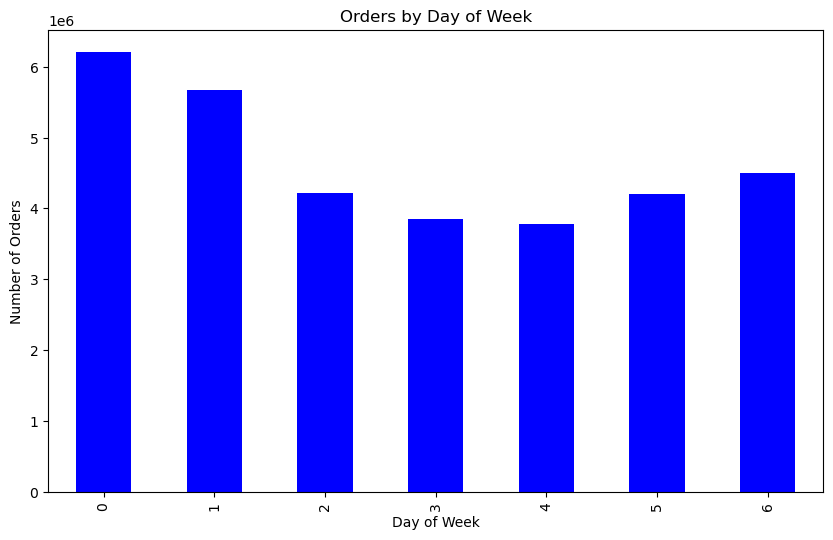

In [21]:
# Bar Chart: Orders by Day of Week
plt.figure(figsize=(10,6))
bar = df_combined['order_day_of_week'].value_counts().sort_index().plot.bar(color='blue')
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()
bar.figure.savefig(os.path.join(visualization_path, 'bar_orders_dow.png'))

The chart shows that the highest number of orders occurs on Day 0, followed closely by Day 1. The number of orders drops significantly during the weekdays, with the lowest number of orders being on Day 3. This pattern suggests that customers are more likely to place orders during the weekends, possibly due to having more free time for grocery shopping.

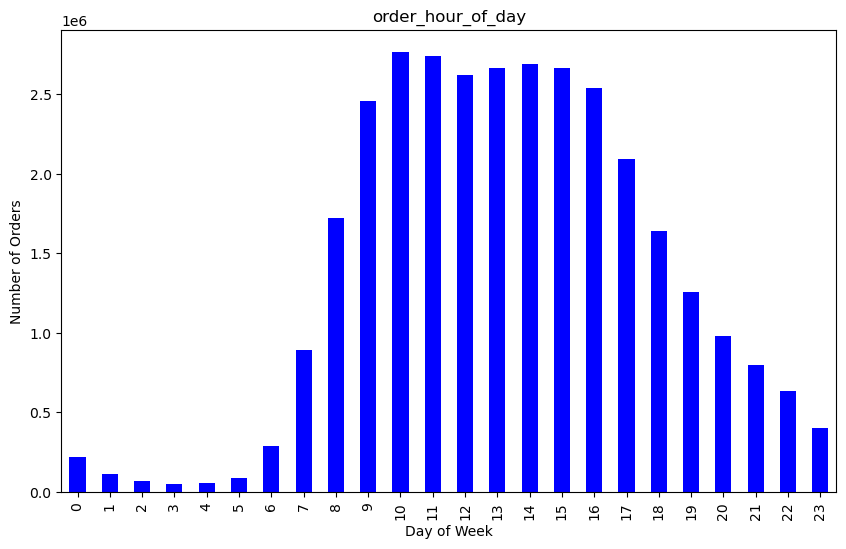

In [19]:
# Bar Chart: Orders by Day of Week
plt.figure(figsize=(10,6))
bar = df_combined['order_hour_of_day'].value_counts().sort_index().plot.bar(color='blue')
plt.title('order_hour_of_day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()
bar.figure.savefig(os.path.join(visualization_path, 'bar_orders_dow.png'))

The chart indicates that the most orders are placed between 10 AM and 3 PM, with a peak around 12 PM. 

In [25]:
#creating a sample of the dataframe
sampled_df = df_combined.sample(n=100000, random_state=1)

In [26]:
#group by hour of the day and calculate the mean expenditure
hourly_expenditure = sampled_df.groupby('order_hour_of_day')['prices'].mean().reset_index()

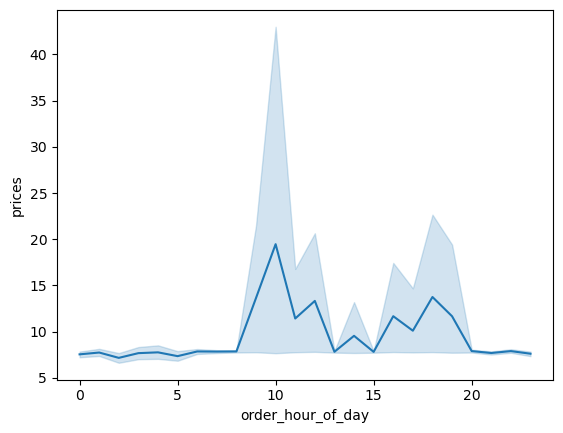

In [27]:
#creating a line chart
line_price_hod = sns.lineplot(data = sampled_df, x = 'order_hour_of_day', y = 'prices')

This histogram shows the frequency of orders based on the time of day. The chart indicates that the most orders are placed between 10 AM and 3 PM, with a peak around 12 PM. Early morning and late evening hours see fewer orders, which is expected as people are less likely to be shopping during these times. The pattern aligns with typical daily routines, where shopping is likely to occur during late morning to early afternoon.

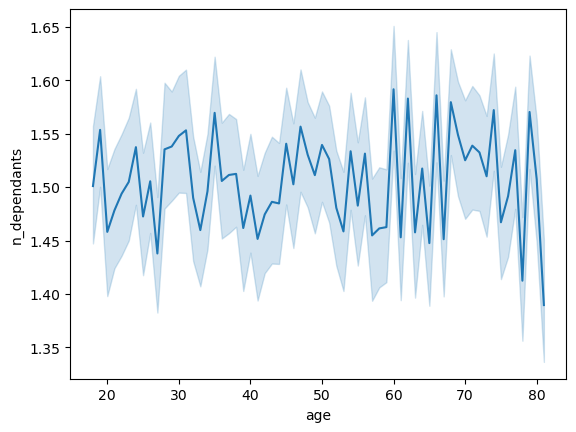

In [55]:
#creating a line chart
line_age_nod = sns.lineplot(data = sampled_df, x = 'age', y = 'n_dependants')



                      No correlation

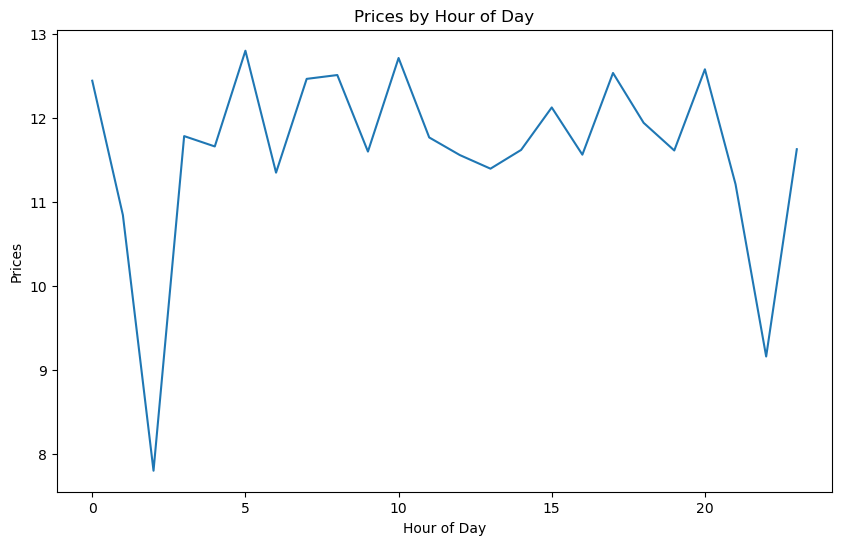

In [34]:
# Line Chart: Prices by Hour of Day using a sample
np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7
small_sample = df_combined[~dev][['order_hour_of_day', 'prices']]

plt.figure(figsize=(10,6))
line = sns.lineplot(data=small_sample, x='order_hour_of_day', y='prices', errorbar=None)
plt.title('Prices by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Prices')
plt.show()
line.figure.savefig(os.path.join(visualization_path, 'line_prices_hour.png'))

This line chart displays the variation in average prices based on the hour of the day. The chart shows that the prices fluctuate throughout the day, with notable peaks around 3 AM, 9 AM, and 10 PM. The lowest prices seem to occur at 6 AM. This could indicate a pattern where certain hours have discounts or where different types of products (perhaps more expensive ones) are purchased at specific times.

In [41]:
# Ensure the 'loyalty_flag' column is created based on the number of orders
df_combined['loyalty_flag'] = df_combined['order_number'].apply(
    lambda x: 'Loyal customer' if x > 40 else ('Regular customer' if x > 10 else 'New customer')
)

# Verify the creation of the 'loyalty_flag' column
print(df_combined['loyalty_flag'].head())



0    New customer
1    New customer
2    New customer
3    New customer
4    New customer
Name: loyalty_flag, dtype: object


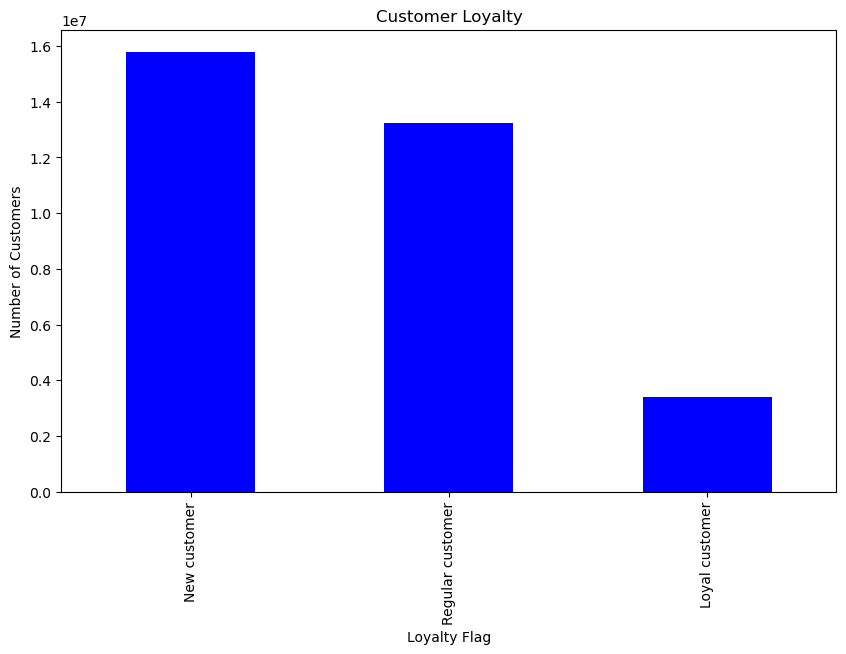

In [43]:
# Bar Chart: Loyalty Flag
plt.figure(figsize=(10,6))
bar = df_combined['loyalty_flag'].value_counts().plot.bar(color='blue')
plt.title('Customer Loyalty')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Customers')
plt.show()


The majority of customers fall under the ‘‘New Customers’’ category, indicating that a large portion of the user base is new customers. ‘Regular Customers’ also form a significant portion, while ‘loyal Customers’ make up the smallest group. 

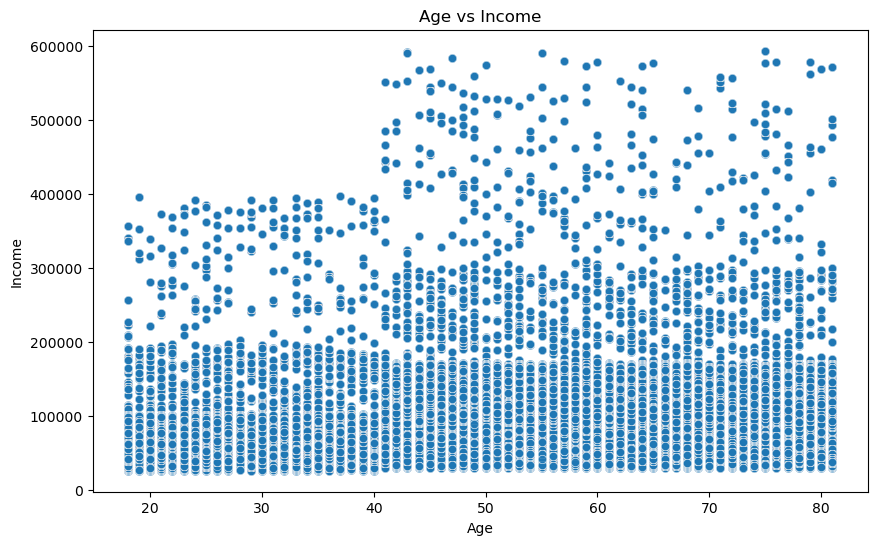

In [33]:
# Scatterplot: Age vs Income
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x='age', y='income', data=df_combined, alpha=0.3)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()
scatter.figure.savefig(os.path.join(visualization_path, 'scatter_age_income.png'))


The plot reveals a wide spread of income levels across different age groups. However, there seems to be a cluster of customers between the ages of 25 and 70 with incomes predominantly below $300,000. A smaller group of older customers (mostly above 40) tends to have higher incomes, with some reaching up to $600,000. This suggests that income tends to increase with age, at least up to a certain point, and then levels off.

In [37]:
# Export visualizations
bar.figure.savefig(os.path.join(visualization_path, 'bar_orders_dow.png'))
hist.figure.savefig(os.path.join(visualization_path, 'hist_order_hour.png'))
scatter.figure.savefig(os.path.join(visualization_path, 'scatter_prices_hour.png'))
line.figure.savefig(os.path.join(visualization_path, 'line_prices_hour.png'))
scatter.figure.savefig(os.path.join(visualization_path, 'scatter_age_income.png'))
